In [ ]:
# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [21]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from scipy import misc

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [9]:

def conv_fn(x,h):

    final=listofzeros = [0] * (len(h)+len(x)-1) #create a list of zero the size of the result list
    temporary=np.zeros((len(x), len(h)+len(x)-1)) #create a temporary matrix and fill it with zero
    
    
#create a temporary matrices wich will store the multiplication 
#with the retard adding at each step
    for i in range (0,len(x)):
        for n in range (0,len(h)):
            temporary[i][n+i]=x[i]*h[n] #this will calculate and store the temporary result. The [n+i] 
                                    #add a shifting in the matrix each time that multiply by a new x[i]

#Simply sum each column to return the result            
    for i in range (0,len(final)):
        for n in range (0, len(x)):
            final[i]=temporary[n][i]+final[i]
    
    
    return(final)
    

In [19]:
x=[1,2,3,4]

h=[-1,1]
print ("input signal :" , h)
print ("output signal :", conv_fn(x,h))
print("")

dirac=[1,0,0,0,0]
print ("input signal :" , dirac)
print ("output signal :", conv_fn(x,dirac))
print("")

step=[1,1,1,1,1]
print ("input signal :" , step)
print ("output signal :", conv_fn(x,step))
print("")


e=[np.exp(0),np.exp(1),np.exp(2),np.exp(3),np.exp(4),np.exp(5)]
print ("input signal :" , e)
print ("output signal :", conv_fn(x,e))
print("")


xsymmetric=[4,3,2,1,1,2,3,4,4,3,2,1]
xperiodic=[1,2,3,4,1,2,3,4,1,2,3,4]
xconstantevaluepadding=[1,1,1,1,2,3,4,4,4,4,4]
H=[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]

('input signal :', [-1, 1])
('output signal :', [-1.0, -1.0, -1.0, -1.0, 4.0])

('input signal :', [1, 0, 0, 0, 0])
('output signal :', [1.0, 2.0, 3.0, 4.0, 0.0, 0.0, 0.0, 0.0])

('input signal :', [1, 1, 1, 1, 1])
('output signal :', [1.0, 3.0, 6.0, 10.0, 10.0, 9.0, 7.0, 4.0])

('input signal :', [1.0, 2.7182818284590451, 7.3890560989306504, 20.085536923187668, 54.598150033144236, 148.4131591025766])
('output signal :', [1.0, 4.7182818284590446, 15.825619755848741, 47.018494606426103, 127.80951949014771, 347.42229433415071, 540.96291599733661, 663.63207744030672, 593.6526364103064])



## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


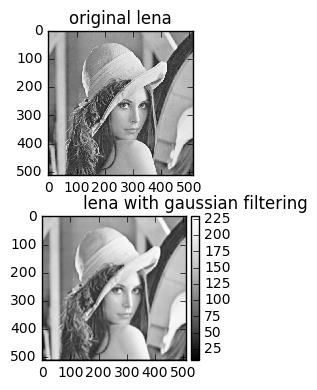

In [26]:


def conv_2d(image,kernel_in):
    
    height,width=image.shape[:] #get the dimension of the image

    kernel=len(kernel_in) #get the dimension of the kernel


    result=np.zeros((height,width)) #create the output array the size of the input image


   
    for h in range(0,height):  #for all the pixel in
        for w in range (0,width): #the image
        
            for i in range (-(kernel-1)/2,(kernel-1)/2+1): #for all the 
                for n in range (-(kernel-1)/2,(kernel-1)/2+1): #value in the kernel
                   
                    if ((h-(kernel-1)/2+i<0) | ((w-(kernel-1)/2+n)<0)): #if the value out of the image boundary on top or the left
                        result[h][w]=result[h][w] #do nothings
                    elif ((h+i>=height) | (w+n>=width)):#if the value out of the image boundary on down or the on right
                        result[h][w]=result[h][w] #do nothing
                  
                    else:
                        result[h][w]=result[h][w]+image[h+i][w+n]*kernel_in[i][n] #multiply the kernel and the image
                     
            result[h][w]=result[h][w]/256 #divide the result by 256, doing it now  will reduce roundary error compare to dividing all the kernel directly
            if (result[h][w]>255): #keep the value in the intensity range
                result[h][w]=255
            elif (result[h][w]<0): #keep the value in the intensity range
                result[h][w]=0  
                
                
    return result        


lena_im=(io.imread('../images/lena-grey.bmp'));

kernel_gauss=[[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]] #create the gaussian kernel

lena_gauss=conv_2d(lena_im,kernel_gauss) #convolve the kernel and the image


plt.figure
plt.subplot(2,1,1)
io.imshow(lena_im,cmap='Greys_r')   
plt.title('original lena')
                  
plt.subplot(2,1,2)
io.imshow(lena_gauss,cmap='Greys_r') 
plt.title('lena with gaussian filtering')

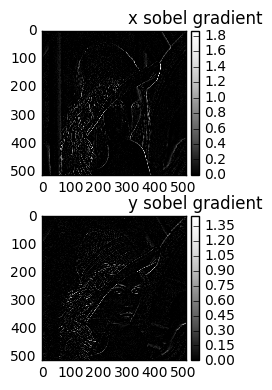

In [27]:
import math

kern_sobelx=[[-1,0,1],[-2,0,2],[-1,0,1]] #define the x sobel kernel
kern_sobely=[[-1,-2,-1],[0,0,0],[1,2,1]] #define the y sobel kernel


lena_sobelx=conv_2d(lena_im,kern_sobelx) 
lena_sobely=conv_2d(lena_im,kern_sobely)

height,width=lena_sobelx.shape[:] #get the dimension of the image

lena_sobel=np.zeros((height,width)) #create the output array


for h in range(0,height):
    for w in range (0,width):
        
        lena_sobel[h][w]=math.sqrt(lena_sobelx[h][w]*lena_sobelx[h][w]+lena_sobely[h][w]*lena_sobely[h][w])#calcule the magnitude of the sobels gradients
        
        if (lena_sobel[h][w]>255): #keep the value in the intensity range
                result[h][w]=255
        elif (lena_sobel[h][w]<0): #keep the value in the intensity range
                result[h][w]=0  

       
plt.figure
plt.subplot(2,1,1)
io.imshow(lena_sobelx,cmap='Greys_r')   
plt.title('x sobel gradient')
                  
plt.subplot(2,1,2)
io.imshow(lena_sobely,cmap='Greys_r') 
plt.title('y sobel gradient')

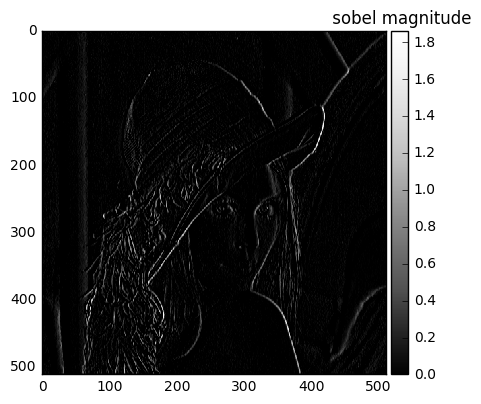

In [28]:
plt.figure
io.imshow(lena_sobelx,cmap='Greys_r')   
plt.title(' sobel magnitude')

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

In [62]:

from skimage import data
from skimage.filters import threshold_otsu, rank
from scipy import signal
from scipy import misc
import numpy as np

text_im=img_as_ubyte(rgb2gray(io.imread('../images/text.png')));
text_im=255-text_im #inverse the image colors

a_im=img_as_ubyte(rgb2gray(io.imread('../images/a.png')));
a_im=255-a_im #inverse the image

threshold_global_otsu = threshold_otsu(a_im) #find Otsu threshold
a_im = a_im >= threshold_global_otsu #apply otsu threshold
a_im=a_im-0 #resolve type problem

threshold_global_otsu = threshold_otsu(text_im) #find Otsu threshold
text_im = text_im >= threshold_global_otsu #apply global otsu thresholding

numberofa=10;

a_coordinates=np.zeros((2,numberofa+1)) #create the array wich will stor the result  of the cross correlation

corr=signal.correlate2d(text_im,a_im,mode='same') #correlate the template and the image

for i in range (0,(numberofa+1)):
    a_coordinates[1][i], a_coordinates[0][i] = np.unravel_index(np.argmax(corr), corr.shape ) #find the hightest correlation value and store the coordinate
    corr[a_coordinates[1][i]][a_coordinates[0][i]]=0; #Get ride of the hightest correlation to find the next one
    
print 'x coordinates :' ,a_coordinates[0]
print 'y coordinates :' ,a_coordinates[1]

x coordinates : [ 142.  136.  167.   88.  161.  122.   15.  130.   95.  152.   33.]
y coordinates : [  30.   56.  108.  134.  134.  160.  186.  212.  238.  238.  290.]


/home/sav/Vibot/Python/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


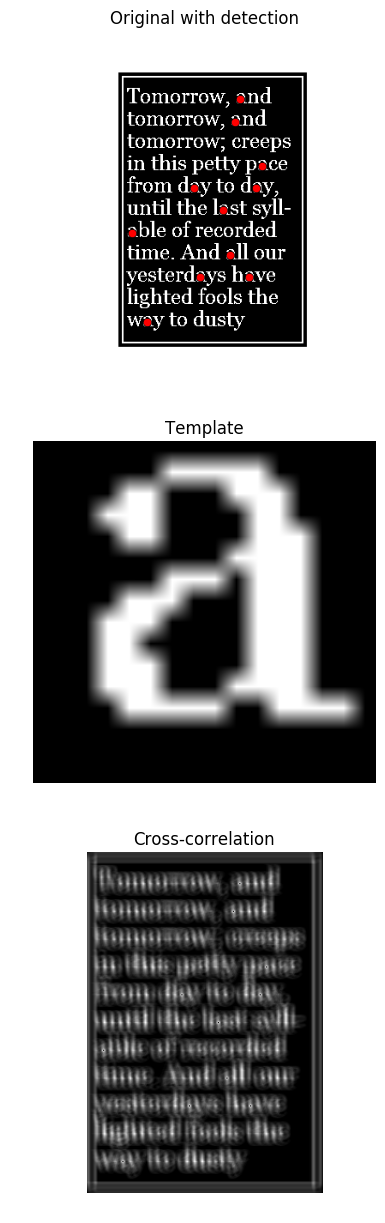

In [63]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15)) 
ax_orig.imshow(text_im[:][:], cmap='gray')
ax_orig.set_title('Original with detection')
ax_orig.set_axis_off()
ax_template.imshow(a_im, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()


for i in range (0,numberofa+1):
    ax_orig.plot(a_coordinates[0][i],a_coordinates[1][i], 'ro')  #add the red points on the image
    
fig.show()